Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Matthew Sah"
COLLABORATORS = ""

---

# Problem 1 - Testing for Fibonacci Number (10 points)

Develop functions to handle [Fibonacci numbers](http://mathworld.wolfram.com/FibonacciNumber.html). Try to design the quickest possible algorithm and record the time taken for the code to run.

Test if a number belongs to the Fibonacci series, using `if-else` conditions. The logic of testing if a number, $n$, belongs to the Fibonacci series is: if one or both of $(5*n^2 + 4)$ or $(5*n^2 – 4)$ is a perfect square.

Here is what you need to do:
1. You will need to implement the function `fibonacciGenerator`, which takes no inputs. The function should return a Python `list` of length 25, with first 25 Fibonacci numbers.
2. You will need to define a function `fibonacciTester`, which takes a single number as input, and returns `true` if the number belongs to the Fibonacci series, and `false` otherwise. 

In [2]:
def fibonacciGenerator(): 
    fib_list = [0]
    pointer = 1
    for x in range(0 , 24):
        if len(fib_list) <= 1:
            fib_list.append(1)
        else:
            fib_list.append(fib_list[x] + fib_list[x-1])
         
    return(fib_list)
    
import time
st = time.time()
l = fibonacciGenerator()
en = time.time()
print(l)
print("The code took %d seconds."%(en - st))  


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]
The code took 0 seconds.


In [3]:
assert fibonacciGenerator() == [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]


In [4]:
def fibonacciTester(number):
    
    if number >= 0: 
        import math  
        perfectSquarePlus = (number * number * 5) + 4 
        perfectSquareMinus = (number * number * 5) - 4 
        perfectSquarePlusSqrt = math.sqrt(perfectSquarePlus) 
        testIntPerfectSquarePlusSqrt = perfectSquarePlusSqrt* perfectSquarePlusSqrt
        
        try:
            perfectSquareMinusSqrt = math.sqrt(perfectSquareMinus) 
            testIntPerfectSquareMinusSqrt = perfectSquareMinusSqrt * perfectSquareMinusSqrt
        except:
            pass 
        
        if testIntPerfectSquarePlusSqrt == perfectSquarePlus and perfectSquarePlusSqrt.is_integer() : 
            return True
        else: 
            if  testIntPerfectSquareMinusSqrt == perfectSquareMinus and perfectSquareMinusSqrt.is_integer():
                return True 
                    
            return False 
    else:    
        return False
    
import time
st = time.time()
for i in range(1,21):
    v = fibonacciTester(i)
    print(v)
en = time.time()
print("The code took %d seconds."%(en - st))    

True
True
True
False
True
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
The code took 0 seconds.


In [5]:
assert fibonacciTester(0) == True
assert fibonacciTester(4) == False
assert fibonacciTester(-1) == False
assert fibonacciTester(7.1) == False

# Problem 2 - Handling Exceptions (10 Points)
In this problem you will read from a text file (**data_p2.txt**) included in the assignment. Please download it and store it in the same directory as this notebook. The code for reading data from the file is given below. You need to store the data and perform a simple mathematical operation on each data point. Each line is _supposed_ to contain a floating point number. But what you will observe is that some lines might have erroneous entries. You need to ignore those lines (Hint: Use `Exception` handling). 

The idea is to implement a function, `computeMedian()`, which reads in a file and computes the median of the numbers and returns the output. You may use the inbuilt function `sort` when computing the median.

_DO NOT USE ANY INBUILT OR OTHER FUNCTION TO DIRECTLY COMPUTE MEDIAN_

In [6]:
# Reading from a file. The following code just reads in every line in a text file without doing anything with it.
# You can use the code in your solution. DO NOT CALL this function in your implementation.
def dummyFileReader():
    with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
        for line in f: #iterate over the file line by line
            s = line.strip() #strip() removes the endline character at the end of the line. Line is of type 'str'
            
            
            
def computeMedian():    
    full_list = []
    with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
        for line in f: #iterate over the file line by line
            s = line.strip() #strip() removes the endline character at the end of the line. Line is of type 'str'
            try:
                full_list.append(float(s))
            except:
                pass
                #print("value error" , s) 
    full_list_sorted = sorted(full_list)   
    if len(full_list_sorted)%2 == 0 :
        final_answer = (full_list_sorted[int(len(full_list_sorted)/2)] + full_list_sorted[int(len(full_list_sorted)/2)+1])/2
        return final_answer
    else : 
        return full_list_sorted[int(len(full_list_sorted)/2-0.5)]

    

In [7]:
assert computeMedian() == 0.499675

# Problem 3 - Benchmarking Dictionary Performance (10 Points)
We want to check the peformance of the Python inbuilt `del` routine for dropping elements from a dictionary. The question that we want answer for is: 
_Does the time required to delete an element from a Python dictionary depend on the size of the dictionary and on the location of the target element?_

For this experiment, we want to write a function `monitorTime()`, with one parameter input, $n$, that can:

    In each step of the experiment do the following: 
        - Create a dictionary of integers from 1 to N, with your own desired keys. 
        - Within a loop, delete the $i^{th}$ element. Measure the time taken to delete the element (Hint: use the `time` package in Python).
    
    And return the measured time in a list.

Conduct the above experiment for $N = 1,000,000$ and $i$ ranging from $1$ to $1,000,000$ in steps of $10,000$. Make sure that you are recreating the Python dictionary every time. Save the times in a list (let us name it `timeMillion`).

Repeat the above experiment, but set $N = 10,000,000$. This time, vary $i$ from $1$ to $10,000,000$ in steps of $100,000$. Save the times for this experiment in another list, say, `time10Million`.

Plot the two lists using the `matplotlib.pyplot` package. See below for a sample code. You can plot both lists in the same chart to compare.

Using the plots, answer the following (create a markup cell after your code cell(s) and enter your responses):
1. Does the cost of deleting an element depend on the dictionary size?
2. Does the cost of deleting an element depend on the location of the deleted element?

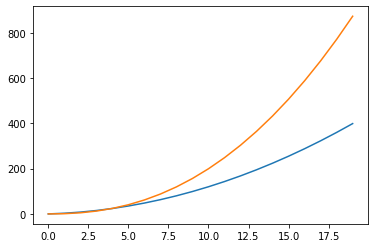

In [8]:
# This cell is only for demonstration purposes, you can reuse parts of this code to create your own plots
# Using matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
# above line is needed to make sure that the plots are displayed in the notebook.

#generate some dummy data
x = list(range(0, 20)) # generate a list
y = [x1**2+2*x1 for x1 in x] # create a new list using the original list. Note the Pythonic inline creation of lists.
y1 = [x1**2.3 for x1 in x]
plt.plot(x,y)
plt.plot(x,y1)

In [9]:
import time
def monitorTime(N):
    steps = N / 100
    steps_pointer = 1 
    timeMillion = []
    
    #1009
    del_recover_dict = N + 1
    
    
    test_dictionary = {}
    for x in range(0, N):
        test_dictionary[x]= x
      
    while( steps_pointer != N):
        
        # Create Dictionary
        #test_dictionary = {}

        st = time.time()
        del test_dictionary[steps_pointer]
        en = time.time()
        
        test_dictionary[del_recover_dict] = del_recover_dict
        del_recover_dict += 1
        
        #timeMillion["Pointer " + str(steps_pointer)] = en - st
        timeMillion.append(en - st)
            
        if steps_pointer == 1:
            steps_pointer = steps
        else:
            steps_pointer += steps
    #print(timeMillion)
    return(timeMillion)
    
time10Million=monitorTime(10000000)
timeMillion=monitorTime(1000000)

In [10]:
assert len(monitorTime(1000000)) == 100
assert len(monitorTime(10000000)) == 100

### 1. Plot your monitored time lists

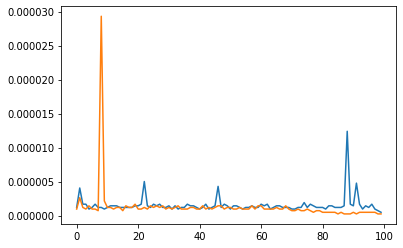

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(time10Million)
plt.plot(timeMillion)

YOUR ANSWER HERE
1. Does the cost of deleting an element depend on the dictionary size?
    No, the time does not depend on the dictionary size
2. Does the cost of deleting an element depend on the location of the deleted element? 
    No, it will not depend on the location

# Problem 4 - The Two Envelopes Problem (20 Points)
The Two Envelopes problem is an interesting decision theory problem.

> Consider that you are given two indistinguishable envelopes, each containing money, one contains twice as much as the other. You may pick one envelope and keep the money it contains. Having chosen an envelope at will, but before inspecting it, you are given the chance to switch envelopes. Should you switch?

> The game is this: "stick" or "switch"; It seems obvious that there is no point in switching envelopes as the situation is symmetric. However, because you stand to gain twice as much money if you switch while risking only a loss of half of what you currently have, it is possible to argue that it is more beneficial to switch. The problem is to show what is wrong with this argument.

**Two Envelopes problem**: Implement a function, called `simulateProblem()`, that does the game simulation for the two envelopes problem. Run the simulation 1000 times to figure out the empirical (observed) probability of gaining more money when switching and gaining more money when sticking to the original choice. Each simulation operates as follows:
1. First, randomly pick an envelopes configuration out of the two possible configurations, $(A,2A)$ or $(2A,A)$. In the first configuration, the second envelope has twice the money and in the second configuration, the first envelope has twice the money.
2. Next, randomly pick one of the two envelopes. 
3. Finally, randomly choose to either stick or switch. The program checks if you won (the envelope that picked has more money) or not (the envelope that picked has less money). In case of winning, record if the winning was because of _sticking_ or _switching_.

You can perform the _random_ choice as follows, using the `np.random.randint()` method.
```python
import numpy as np
print(np.random.randint(2))
```
The `simulateProblem()` function takes no arguments and returns two values, first is a boolean output which is `True` if you win and `False` if you lose. In case of a win, the second output is `True` if the win was due to _sticking_ or the lose was due to _switching_ and `False` if the win was due to _switching_ or the lose was due to _sticking_.

Once the method `simulateProblem()` that does the above steps and returns "sticking",or "switching", depending on the win/loss scenario, run the method 1000 times and count the number of times the win was due to _sticking_ to the pick in Step 2, and number of times the win was due to _switching_ the envelope.

In [12]:
import numpy as np
import math
def simulateProblem(): 
    # Return two boolean values,  first is win/lose, second is switch or no switch
    #because you stand to gain twice as much money 
    #if you switch while risking only a loss of half of what you currently have, 
    #it is possible to argue that it is more beneficial to switch. 
    #The problem is to show what is wrong with this argument.
    correct_answer = np.random.randint(2) 
    
    my_answer = np.random.randint(2) 
    
    do_switch = np.random.randint(2) 
    
    # swtich answer
    if do_switch == 1:
        my_answer = abs(my_answer - 1) 
        if my_answer == correct_answer:
            return True, True
        else:
            return False, True
    else:
        if my_answer == correct_answer:
            return True, False
        else:
            return False, False  

In [13]:
assert type(simulateProblem()[0]) == bool
assert type(simulateProblem()[1]) == bool

In [14]:
def run_simulation():
    """
    The function Run the simulation 1000 times to figure out 
    the empirical (observed) probability of gaining more money when switching 
    and gaining more money when sticking to the original choice.
    Return the probability of win due to sticking and win due to switching
    """
    # YOUR CODE HERE 
    # Do test and training cases with 500 each, 
    # Accumulate 500 for each
    total_run_count = 1000
    accumulated_count_individual  = total_run_count/2
    count = 0 
    did_change_count = 0
    did_change_count_correct = 0
    didnt_change_count = 0
    didnt_change_count_correct = 0
    while count < total_run_count:
        
        response = simulateProblem()
        is_correct = response[0]
        did_change = response[1] 
        # === run 1000 times total ===
        count +=1
        if did_change == True:
            if is_correct == True:
                did_change_count_correct +=1
            did_change_count+=1
        else:
            if is_correct == True:
                didnt_change_count_correct +=1
            didnt_change_count+=1
            
        # === Run 500 times each ===
        #if did_change_count < accumulated_count_individual:
        #    did_change_count +=1 
        #    if is_correct == True:
        #        did_change_count_correct +=1
        #    count +=1
        #elif didnt_change_count < accumulated_count_individual:
        #    didnt_change_count +=1
        #    if is_correct == True:
        #        didnt_change_count_correct +=1
        #    count +=1
                
    print("Didn't change count : ", didnt_change_count , ".\nDid change count", did_change_count, "\n")
    print("Didnt change correct" ,didnt_change_count_correct , ".\nDid change correct" ,did_change_count_correct, "\n")
    print("Correctness of switching is : ",  did_change_count_correct/did_change_count )
    print("Correctness of non switching is : " , didnt_change_count_correct/didnt_change_count )


### 1. Print you returned values here, your return values should be decimal values

In [17]:
run_simulation()   
print("______________________")
run_simulation()   

Didn't change count :  496 .
Did change count 504 

Didnt change correct 248 .
Did change correct 252 

Correctness of switching is :  0.5
Correctness of non switching is :  0.5
______________________
Didn't change count :  458 .
Did change count 542 

Didnt change correct 235 .
Did change correct 278 

Correctness of switching is :  0.5129151291512916
Correctness of non switching is :  0.5131004366812227


### 2. Give your observation and argument:
 Which is better - Sticking or Switching ？

In [16]:
print("It doesnt matter, there is no significant Difference.")

It doesnt matter, there is no significant Difference.
